In [6]:
from collections import defaultdict
import gzip
import json
from pathlib import Path
import random
import numpy as np

from scipy.io import wavfile
import torch
from torch.nn import functional as F

In [21]:
import os
filenames = os.listdir('./audio')

In [22]:
len(filenames)

289205

In [23]:
instrument_list = list(map(lambda x: x.split('_')[0], filenames))

In [93]:
#[x for x in filenames if x.split('_')[0] == 'vocal' and x.split('_')[1] == 'synthetic' and x[-6:-4] == '25']
[x for x in filenames if x.split('_')[0] == 'string']

['string_acoustic_018-030-127.wav',
 'string_acoustic_060-049-100.wav',
 'string_acoustic_089-057-025.wav',
 'string_acoustic_033-040-050.wav',
 'string_acoustic_047-068-100.wav',
 'string_acoustic_090-069-127.wav',
 'string_acoustic_044-067-127.wav',
 'string_acoustic_068-066-025.wav',
 'string_acoustic_086-048-075.wav',
 'string_acoustic_018-060-075.wav',
 'string_acoustic_005-076-100.wav',
 'string_acoustic_043-076-025.wav',
 'string_acoustic_035-066-100.wav',
 'string_acoustic_031-036-127.wav',
 'string_acoustic_004-082-050.wav',
 'string_acoustic_031-052-050.wav',
 'string_acoustic_026-076-050.wav',
 'string_acoustic_069-055-050.wav',
 'string_acoustic_075-097-100.wav',
 'string_acoustic_017-091-127.wav',
 'string_acoustic_085-080-127.wav',
 'string_acoustic_082-029-050.wav',
 'string_acoustic_066-095-075.wav',
 'string_acoustic_069-027-100.wav',
 'string_acoustic_034-088-050.wav',
 'string_acoustic_048-077-075.wav',
 'string_acoustic_033-045-075.wav',
 'string_acoustic_044-038-05

In [72]:
# comparison among pitches
_, wav_052 = wavfile.read('./audio/vocal_synthetic_010-052-025.wav', )
_, wav_035 = wavfile.read('./audio/vocal_synthetic_000-035-025.wav', )
_, wav_086 = wavfile.read('./audio/vocal_synthetic_014-086-025.wav', )

In [99]:
_, wav_synth_lead = wavfile.read('./audio/string_acoustic_045-033-050.wav', )
display(Audio(wav_synth_lead, rate=16000))

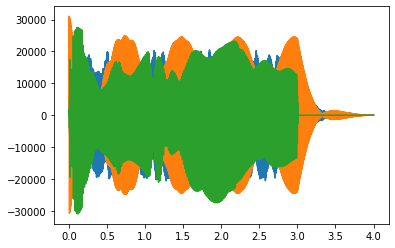

In [82]:
plt.plot(np.linspace(0, 4, 16000*4), wav_086)
plt.plot(np.linspace(0, 4, 16000*4), wav_052)
plt.plot(np.linspace(0, 4, 16000*4), wav_035)


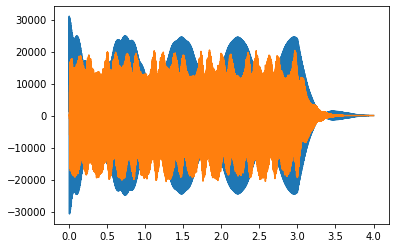

In [102]:

plt.plot(np.linspace(0, 4, 16000*4), wav_052)
plt.plot(np.linspace(0, 4, 16000*4), wav_086)

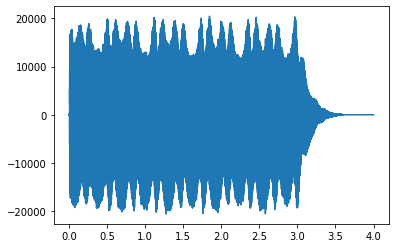

In [79]:
plt.plot(np.linspace(0, 4, 16000*4), wav_086)
display(Audio(wav_086, rate=16000))

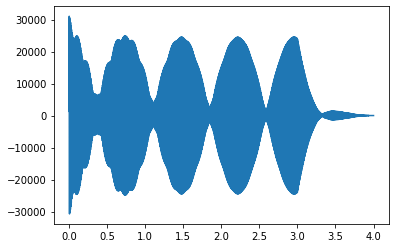

In [80]:
plt.plot(np.linspace(0, 4, 16000*4), wav_052)
display(Audio(wav_052, rate=16000))

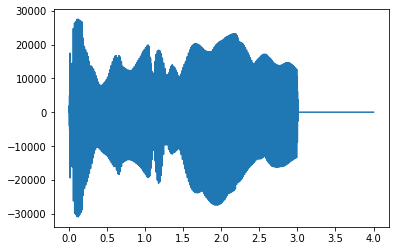

In [81]:
plt.plot(np.linspace(0, 4, 16000*4), wav_035)
display(Audio(wav_035, rate=16000))

In [62]:
_, wav_keyboard = wavfile.read('./audio/keyboard_synthetic_010-063-025.wav', )
_, wav_flute = wavfile.read('./audio/synth_lead_synthetic_010-063-025.wav', )

In [50]:
_, wav_vocal_acou= wavfile.read('./audio/vocal_acoustic_010-063-025.wav', )

In [51]:
_, wav_synth = wavfile.read('./audio/vocal_synthetic_010-063-025.wav', )

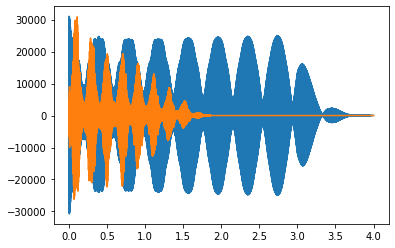

In [100]:
plt.plot(np.linspace(0, 4, 16000*4), wav_synth)
plt.plot(np.linspace(0, 4, 16000*4), wav_keyboard)
#plt.plot(np.linspace(0, 4, 16000*4), wav_vocal_acou)


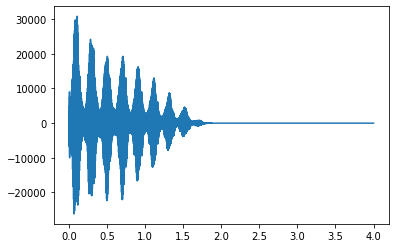

In [47]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, 4, 16000*4), wav)

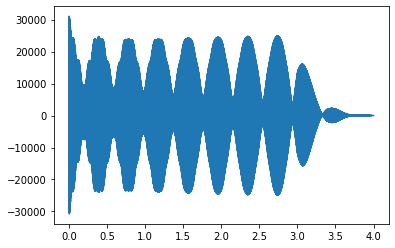

In [43]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, 4, 16000*4), wav)

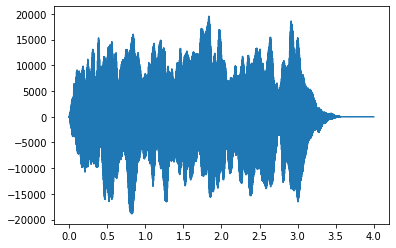

In [38]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, 4, 16000*4), wav)

In [48]:
from IPython.display import Audio, display
# keyboard
display(Audio(wav, rate=16000))

In [44]:
from IPython.display import Audio, display
display(Audio(wav, rate=16000))

In [39]:
from IPython.display import Audio, display
display(Audio(wav, rate=16000))

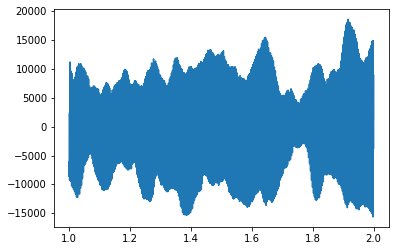

In [40]:
plt.plot(np.linspace(1, 2, 16000), wav[16000*2:16000*3])

In [41]:
from IPython.display import Audio, display
display(Audio(wav[16000*2:16000*3], rate=16000))

In [38]:
display(Audio(wav[16000:16000*2], rate=16000))

In [8]:
display(Audio(wav[np.sin(np.linspace(0, 1, 16000))], rate=16000))

IndexError: arrays used as indices must be of integer (or boolean) type

In [9]:
np.sin(np.linspace(0, 1, 16000))

array([0.00000000e+00, 6.25039065e-05, 1.25007813e-04, ...,
       8.41403436e-01, 8.41437212e-01, 8.41470985e-01])

In [1]:
# read example.json file
import json
from pathlib import Path


In [2]:
file = open('./examples.json', 'rb')
metadata = json.load(file)
names = sorted(metadata.keys())

In [97]:
metadata['string_acoustic_089-057-025']

{'note': 41418,
 'sample_rate': 16000,
 'pitch': 57,
 'instrument_source': 0,
 'instrument_family_str': 'string',
 'instrument_str': 'string_acoustic_089',
 'note_str': 'string_acoustic_089-057-025',
 'qualities_str': ['bright', 'nonlinear_env', 'reverb'],
 'instrument_source_str': 'acoustic',
 'velocity': 25,
 'instrument_family': 8,
 'instrument': 840,
 'qualities': [1, 0, 0, 0, 0, 0, 1, 0, 1, 0]}

In [4]:
instruments = {}
for meta in metadata.values():
    instruments[meta['instrument_str']] = meta['instrument']

In [5]:
instruments.keys()

dict_keys(['guitar_acoustic_001', 'bass_synthetic_120', 'organ_electronic_120', 'guitar_electronic_021', 'organ_electronic_011', 'keyboard_electronic_089', 'bass_synthetic_016', 'keyboard_acoustic_010', 'keyboard_acoustic_011', 'keyboard_electronic_100', 'vocal_synthetic_012', 'vocal_synthetic_007', 'organ_electronic_002', 'keyboard_electronic_065', 'guitar_electronic_035', 'organ_electronic_111', 'keyboard_electronic_087', 'string_acoustic_006', 'bass_synthetic_037', 'reed_acoustic_041', 'flute_acoustic_030', 'mallet_electronic_001', 'bass_synthetic_004', 'guitar_electronic_004', 'bass_synthetic_130', 'bass_synthetic_020', 'string_acoustic_075', 'string_acoustic_069', 'keyboard_electronic_097', 'reed_acoustic_051', 'bass_synthetic_094', 'bass_synthetic_077', 'keyboard_acoustic_009', 'bass_synthetic_079', 'bass_synthetic_002', 'mallet_synthetic_003', 'brass_acoustic_018', 'keyboard_electronic_005', 'bass_synthetic_010', 'bass_synthetic_042', 'organ_electronic_061', 'guitar_synthetic_00